# Analysing Political Executives with AI

## Using AutoGluon to processing the data


```shell
# Link for how to install autogluon on Windows system
# https://auto.gluon.ai/stable/index.html
# For other operation systems, please also check this link for latest news. 

# test automl model
# install autogluon
!pip3 install -U pip
!pip3 install -U setuptools wheel

# CPU version of pytorch has smaller footprint - see installation instructions in
# pytorch documentation - https://pytorch.org/get-started/locally/
!pip3 install torch==1.10.1+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html

!pip3 install autogluon
```

In [99]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split #splitting the dataset
import numpy as np
from ML_figures.figures import act_pred

# Showing all the details of results
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [100]:
# Import the data file
train_data = TabularDataset('./../Data/data_AutoGluon.csv')

type(train_data)

train_data.columns

train_data.describe()

Loaded data from: ./../Data/data_AutoGluon.csv | Columns = 23 / 23 | Rows = 922 -> 922


autogluon.core.dataset.TabularDataset

Index(['ccode', 'leader', 'entry', 'exit', 'exitcode', 'prevtimesinoffice',
       'posttenurefate', 'gender', 'yrborn', 'yrdied', 'numentry', 'numexit',
       'yrbegin', 'yrend', 'pop_x', 'begin_gdppc', 'pop_y', 'age', 'tenure',
       'growth_rate', 'fties_range', 'growth_rate_normgroup',
       'growth_rate_avggrp'],
      dtype='object')

,ccode,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,numentry,...,yrend,pop_x,begin_gdppc,pop_y,age,tenure,growth_rate,fties_range,growth_rate_normgroup,growth_rate_avggrp
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,...,922.000000,902.000000,922.000000,899.000000,922.000000,922.000000,922.000000,922.0,922.000000,922.000000
mean,0.390935,0.079718,0.151302,0.372017,0.062093,0.496475,0.511388,0.553885,0.652212,0.079718,...,0.643300,0.031253,0.052354,0.029527,0.541718,0.086704,0.020790,1.0,3.924078,4.815618
std,0.289082,0.197406,0.283199,0.214789,0.146002,0.263134,0.074636,0.224373,0.463421,0.197406,...,0.277630,0.097848,0.069842,0.091977,0.151286,0.111121,0.047728,0.0,0.504793,0.500440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.320763,1.0,1.000000,1.000000
25%,0.158025,0.000000,0.000000,0.285714,0.000000,0.250000,0.500000,0.381503,0.000000,0.000000,...,0.424460,0.002552,0.012873,0.002473,0.434783,0.021276,0.003340,1.0,4.000000,5.000000
50%,0.374074,0.000000,0.000000,0.285714,0.000000,0.625000,0.500000,0.595376,0.970968,0.000000,...,0.690647,0.006850,0.028166,0.006395,0.536232,0.061088,0.019832,1.0,4.000000,5.000000
75%,0.553086,0.000000,0.166667,0.285714,0.000000,0.625000,0.500000,0.734104,0.987097,0.000000,...,0.884892,0.026059,0.061935,0.024348,0.637681,0.102047,0.039507,1.0,4.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.532870,1.0,7.000000,7.000000


## Three difference cases

In [101]:
# delete other irrelevant columns
del train_data['growth_rate_normgroup']
# del train_data['growth_rate_avggrp']
del train_data['growth_rate']
train_data.columns

# change label into growth_rate
# id, label = 'leader', 'growth_rate'

# change label into growth_rate_normgroup
# id, label = 'leader', 'growth_rate_normgroup'

# change label into growth_rate_avggrp
id, label = 'leader', 'growth_rate_avggrp'
df_train = train_data
df_train.dtypes

Index(['ccode', 'leader', 'entry', 'exit', 'exitcode', 'prevtimesinoffice',
       'posttenurefate', 'gender', 'yrborn', 'yrdied', 'numentry', 'numexit',
       'yrbegin', 'yrend', 'pop_x', 'begin_gdppc', 'pop_y', 'age', 'tenure',
       'fties_range', 'growth_rate_avggrp'],
      dtype='object')

ccode                 float64
leader                 object
entry                 float64
exit                  float64
exitcode              float64
prevtimesinoffice     float64
posttenurefate        float64
gender                float64
yrborn                float64
yrdied                float64
numentry              float64
numexit               float64
yrbegin               float64
yrend                 float64
pop_x                 float64
begin_gdppc           float64
pop_y                 float64
age                   float64
tenure                float64
fties_range           float64
growth_rate_avggrp      int64
dtype: object

In [102]:
#split train data and test data
# df_train, df_test=train_test_split(train_data, test_size=0.33, random_state=1)
# df_train.shape, df_test.shape

In [103]:
predictor = TabularPredictor(label=label).fit(
    df_train.drop(columns=[id, 'leader']))

No path specified. Models will be saved in: "AutogluonModels\ag-20230612_091008\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230612_091008\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    922
Train Data Columns: 19
Label Column: growth_rate_avggrp
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	7 unique label values:  [5, 4, 6, 3, 7, 1, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Fraction of data from classes with at least 10 examples that will be kept for training models: 0.9869848156182213
Train Data Class Count: 3
Using Feature Generators to preprocess the data .

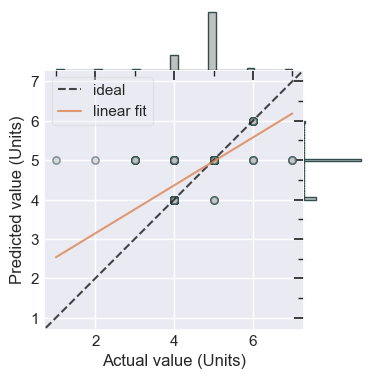

In [104]:
x = train_data[label]
y = predictor.predict(train_data.drop(columns=[label]))

act_pred(x, y, reg_line=True, name = 'ave', save_dir='Images/')

In [105]:
predictor.leaderboard(df_train.drop(columns=[id, 'leader']), silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestEntr,0.949024,0.807692,0.063001,0.036000,0.346000,0.063001,0.036000,0.346000,1,True,6
1,WeightedEnsemble_L2,0.949024,0.807692,0.065001,0.036000,0.619007,0.002000,0.000000,0.273007,2,True,13
2,RandomForestGini,0.947939,0.802198,0.079000,0.035999,0.348001,0.079000,0.035999,0.348001,1,True,5
3,ExtraTreesEntr,0.946855,0.796703,0.068000,0.041000,0.336994,0.068000,0.041000,0.336994,1,True,9
4,ExtraTreesGini,0.945770,0.791209,0.071001,0.044000,0.325000,0.071001,0.044000,0.325000,1,True,8
5,LightGBMLarge,0.938178,0.796703,0.011000,0.002000,1.333508,0.011000,0.002000,1.333508,1,True,12
6,KNeighborsDist,0.937093,0.747253,0.012002,0.007998,0.005001,0.012002,0.007998,0.005001,1,True,2
7,XGBoost,0.830803,0.791209,0.028999,0.002000,0.382000,0.028999,0.002000,0.382000,1,True,10
8,LightGBM,0.811280,0.796703,0.006000,0.001000,0.448000,0.006000,0.001000,0.448000,1,True,4
9,CatBoost,0.806941,0.802198,0.007999,0.001000,1.038155,0.007999,0.001000,1.038155,1,True,7


In [106]:
predictor.feature_importance(df_train, subsample_size=None)

These features in provided data are not utilized by the predictor and will be ignored: ['leader', 'fties_range']
Computing feature importance via permutation shuffling for 18 features using 910 rows with 5 shuffle sets...
	7.03s	= Expected runtime (1.41s per shuffle set)
	0.56s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
begin_gdppc,0.043736,0.004067,0.000009,5,0.052111,0.035361
ccode,0.037802,0.005742,0.000062,5,0.049624,0.025980
tenure,0.037802,0.006666,0.000111,5,0.051528,0.024076
yrborn,0.037582,0.004067,0.000016,5,0.045957,0.029208
yrbegin,0.033407,0.002142,0.000002,5,0.037817,0.028996
yrend,0.028791,0.003759,0.000034,5,0.036531,0.021052
pop_x,0.027912,0.003527,0.000030,5,0.035174,0.020650
yrdied,0.020659,0.003678,0.000116,5,0.028232,0.013087
age,0.015385,0.003645,0.000351,5,0.022889,0.007880
pop_y,0.014286,0.003009,0.000223,5,0.020482,0.008089


In [107]:
# predictor.evaluate(df_test.drop(columns=[id, 'leader']))